

#  Práctica entregable 

La siguiente práctica se entregará a través del aula virtual. 

Tiene ejercicios parecidos a los que estamos realizando en clase que implican implementar conceptos vistos en teoría. 

Instrucciones
* Podeis usar/consultar la teoría para realizar los ejercicios
* No podeis usar el código de las prácticas anteriores
* No podeis emplear Internet 
* Los ejercicios tienen que tener todo el código necesario para llegar a la solución
   

In [1]:
#librerias necesarias para la práctica
%matplotlib inline 
from collections import deque  
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy import signal
from scipy.io import wavfile
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

## Visualización 

Un gráfico típico que nos encontraremos en la teoría y en los libros es el de "piruleta" o stem (barras con un círculo encima). Este tipo de gráficos se pueden realizar facilmente con matplotlib.  Voy a dejar una función ya configurada que podeis modificar a vuestro gusto.


In [2]:
#Este es un método de visualización muy básico para hacer pruebas
def plot_stem( t , y, y_lim=None, view_baseline=True, title=None):
    """Función que configura y visualiza un gráfico stem 

       Parámetros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los límites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una línea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y)
    plt.setp(baseline, visible=view_baseline)
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    plt.axvline(x=0, linewidth=1,color="black")
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()

## Ejercicios



### <span style='background :yellow' >Ejercicio 1</span>
<b>1.1</b> Genera y visualiza el siguiente tren periódico de impulsos

$p[n]=\sum\limits_{k=-\infty}^{\infty} \delta[n-5k], ~~~~~~~~0<=n<=39$



<b>1.2</b> Genera y visualiza la siguiente secuencia

$x[n]=2\delta[n+2]-\delta[n-4],~~~~~-5<=n<=5$

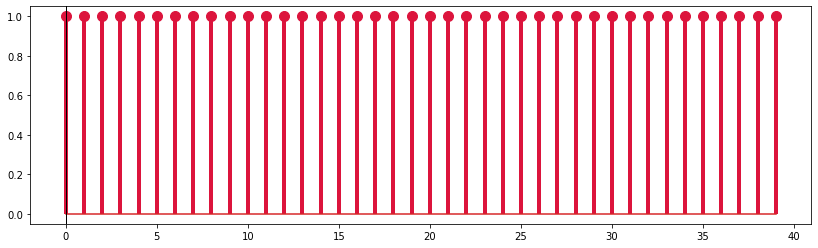

In [3]:
#implementación 1.1
def impulso(x):
    return 1*(x==0)

muestra1_1 = np.arange(0,40,1)
x1_1 = sum([impulso(muestra1_1-i) for i in muestra1_1])
plot_stem(muestra1_1, x1_1)

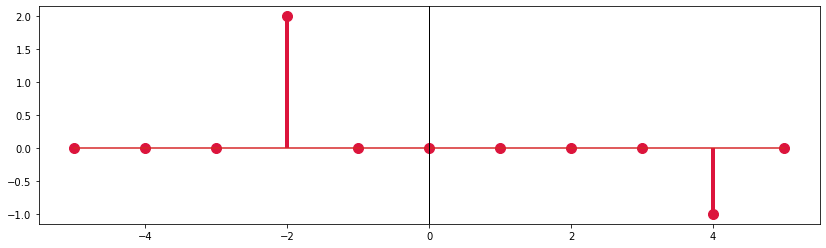

In [4]:
#implementación 1.2
muestra1_2 = np.arange(-5,6,1)
x1_2 = 2*impulso(muestra1_2+2) - impulso(muestra1_2-4)
plot_stem(muestra1_2, x1_2)

###  <span style='background :yellow' >Ejercicio 2</span>

<b>2.1</b> Escribe una función que genere señales sinusoidales. La cabecera de la función será:

<code>def sinusoide (A, w0, fi, n0, n1):</code>

, donde:

<b>INPUTS</b>
* A= amplitud
* $w_0$= frecuencia en radianes
* fi= fase en radianes
* $n_0$= índice temporal de comienzo de la secuencia
* $n_1$= índice temporal del final de la secuencia

<b>OUTPUTS</b>

La función devolverá:
* La secuencia sinusoidal
* Lista con los índices temporales para poder "plotear" la señal



<b>2.2</b> Emplea los siguientes valores con la señal anterior y <b>calcula su potencia media</b>

* |A|=4
* $w_0=\frac{\pi}{15}$
* $\phi=\frac{\pi}{3}$
* $n_0=-20$
* $n_1=40$




In [5]:
#implementación 2.1
def sinusoide (A, w0, fi, n0, n1):
    muestra = np.arange(n0,n1+1,1)
    return [A*np.cos(w0*i + fi) for i in muestra],muestra



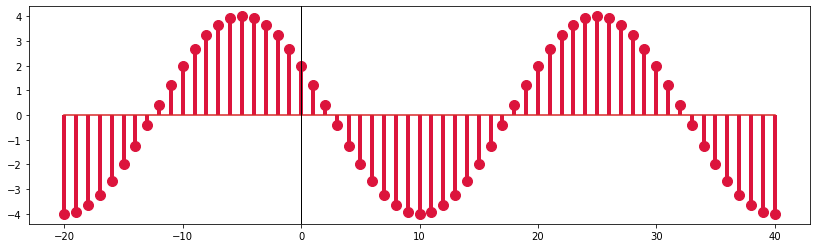

In [6]:
#implementación 2.2
A=4
w0=np.pi/15
fi=np.pi/3
n0=-20
n1=40

sinu,t = sinusoide(A, w0, fi, n0, n1)
plot_stem(t,sinu)

###  <span style='background :yellow' >Ejercicio 3</span>

Cualquier señal arbitraria puede expresarse como la suma de 2 componentes de señal (par e impar). Crea una función que reciba una señal y devuelva sus componentes par e impar

<code>def genera_componentes(signal):</code>

INPUTS
* x= señal original

OUTPUTS
* par: componente par de la señal
* impar: componente impar de la señal


Si sumais las 2 componentes resultantes recuperareis la señal original

<b>NOTAS</b>:

* Podéis suponer que la señal arbitraria siempre tiene elementos impares y que el n=0 es el centro. Eso os ayudará a *doblar* la secuencia
* No teneis que devolver información sobre los índices, solo las componentes par e impar


<b>Ejemplo</b>

$x[n]=\{3,2,2,4,2\}$

$x_{par}=\{\frac{5}{2},3,2,3,\frac{5}{2}\}$


$x_{impar}=\{\frac{1}{2},-1,0,1,-\frac{1}{2}\}$




In [7]:
#implementación 3
def genera_componentes(signal):
    x_par = 0.5*(np.array(signal) + np.array(signal[::-1]))
    x_impar = 0.5*(np.array(signal) - np.array(signal[::-1]))
    return x_par,x_impar

x=[3,2,2,4,2]
x_par,x_impar=genera_componentes(x)
print("Funcion par:",x_par)
print("Funcion impar:",x_impar)
print("Suma:",x_par+x_impar)
print("Señal base:",x)


Funcion par: [2.5 3.  2.  3.  2.5]
Funcion impar: [ 0.5 -1.   0.   1.  -0.5]
Suma: [3. 2. 2. 4. 2.]
Señal base: [3, 2, 2, 4, 2]


###  <span style='background :yellow' >Ejercicio 4</span>
Considerando la interconexión de sistemas LTI mostrado en la figura:
* Obtén la respuesta impulso global en función de $h_1[n]$, $h_2[n]$, $h_3[n]$ y $h_4[n]$. 
  * $h_1[n]=\delta[n] + 0.5\delta[n-1]$
  * $h_2[n]=0.5\delta[n]-0.25\delta[n-1]$
  * $h_3[n]=2\delta[n]$
  * $h_4[n]=-2(0.5)^n u[n]$
  

* Visualiza los primeros 10 elementos de la respuesta impulsional.




Para realizar este ejercicio es necesario tener en cuenta las <b>propiedades de interconexión de los sistemas LTI</b>

![Esquema interconexión de sistemas LTI](interconexion.png)

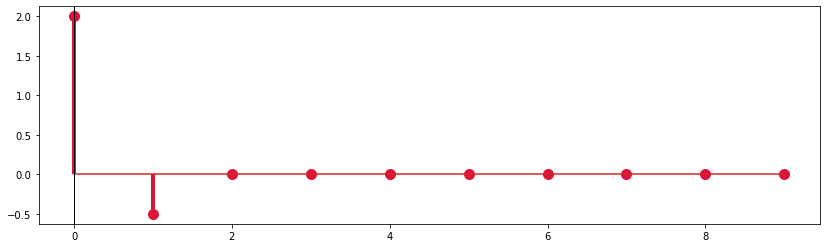

In [8]:
#implementación 4
def exponencial(x, A, alfa, unitario=False):
    return [A*(alfa**i) if i>0 else 0 for i in x] if unitario else [A*(alfa**i)for i in x]
    
def inter_serie(entrada,signal1, signal2=None):
    return np.convolve(entrada,signal1) if signal2==None else np.convolve((np.convolve(entrada,signal1),signal2))
    
def inter_paralelo(signal1,signal2):
    if len(signal1)==len(signal2):
        return signal1 + signal2 
    else:
        dif = len(signal1)-len(signal2)
        return signal1 + np.array(list(signal2)+dif*[0]) if dif>0 else signal2 + np.array(list(signal1)+(-dif)*[0])
muestra4 = np.arange(0,10)

h1 = impulso(muestra4) + 0.5* impulso(muestra4-1)
h2 = 0.5*impulso(muestra4) - 0.25*impulso(muestra4-1)
h3 = 2*impulso(muestra4)
h4 = exponencial(muestra4,-2,0.5,True)

y = (inter_paralelo(inter_serie(impulso(muestra4), h1),\
    inter_paralelo(inter_serie(inter_serie(impulso(muestra4), h2), h3),\
    inter_serie(inter_serie(impulso(muestra4), h2),h4))))

plot_stem(muestra4,y[0:10])

###  <span style='background :yellow' >Ejercicio 5</span>

Dado el sistema LTI que se proporciona (puedes tratarlo como una caja negra), obtén la respuesta $y[n]$ para la secuencia de entrada $x[n]$ empleando la convolución

$x[n]=5\delta[n-2]+2u[n]$



* Os proporciono el sistema ya implementado
* Podeis suponer que las secuencias empiezan en cero para no tener problemas con los índices (negativos) de la convolución
* Podeis procesar $x[n]$ directamente a través del sistema para comprobar el resultado PERO la solución tiene que darse con la convolución
    * Si haceis esta comprobación, tened en cuenta que los índices "por la derecha" pueden variar. Solo os coincidirán los índices comunes
    
    
![title](diagrama_bloques2.png)


In [9]:
#implementación de los bloques básicos
class sumador:
    def __init__(self):
        pass
    def suma(self, x1,x2):
        if not isinstance(x1, list): x1=[x1]
           
        if not isinstance(x2, list):   x2=[x2]
          
        #TODO:  comprobar que son de la misma logitud y actuar en consecuencia
        rdo= [a+b for a,b in zip(x1,x2)]
        return rdo if len(rdo)>1 else rdo[0]
class multiplicador:
    def __init__(self):
        pass
    def multiplica(self, x1,x2):
        if not isinstance(x1, list): x1=[x1]
           
        if not isinstance(x2, list):   x2=[x2]
        rdo= [a*b for a,b in zip(x1,x2)]
        return rdo if len(rdo)>1 else rdo[0]
    def escala(self, x1,c):
        return x1*c
    
    
    
class retardador:
    def __init__(self, retardos,init_value=0):
        retardos=retardos if retardos >0 else 1
        self.buffer=deque([init_value]*retardos, maxlen=retardos)
        
    def add(self, item):
        self.buffer.append(item)
    def get(self):
        return self.buffer[0]
    def print(self):
        print(self.buffer)
         
#implementación del diagrama de bloques
def diagrama_bloques(x):
    signal=x.copy()
    
    entrada_retardo=retardador(1)
    salida_retardo=retardador(1)
    suma=sumador()
    multiplica=multiplicador()
    y=[]
    for i in signal:

        aux=suma.suma(i, entrada_retardo.get())
        entrada_retardo.add(i)
        aux=multiplica.escala(aux, 0.5)
        rdo=suma.suma(aux, multiplica.escala(salida_retardo.get(), 1/4))
        salida_retardo.add(rdo)
        y.append(rdo)
    return y          
         

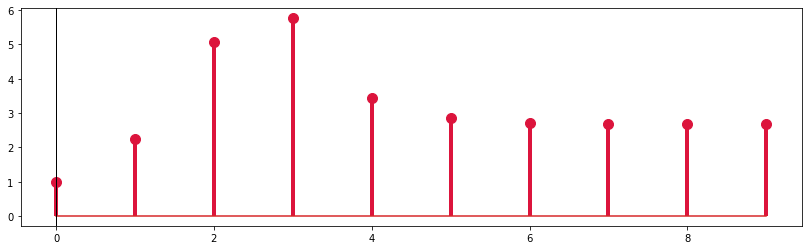

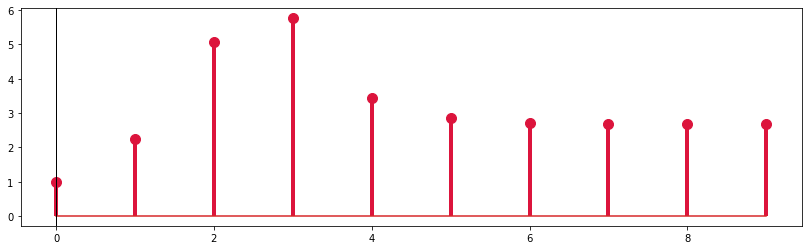

[ True  True  True  True  True  True  True  True  True  True]


In [11]:
#implementación 5
def escalon_unitario(x):
    return 1*(x>=0)

muestra5 = np.arange(0,10)

x = 5*impulso(muestra5-2) + 2*escalon_unitario(muestra5)
h = diagrama_bloques(impulso(muestra5))
y_conv = np.convolve(x,h)
plot_stem(muestra5,y_conv[0:10])


y_diag = diagrama_bloques(x)
plot_stem(muestra5,y_diag[0:10])

print(y_conv[0:10]==y_diag[0:10])

###  <span style='background :yellow' >Ejercicio 6</span>
Un sistema LIT tiene una respuesta al impulso definida como:


 $h[n] = \left \{ \begin{matrix} 0, & n<0
\\1, & 0<=n<=3
\\-2, & 4<=n<=5
\\ 0 & n>5\end{matrix}\right.$ 


* Genera una respuesta impulsional $h[n]$ con $-10<=n<=10$
* Calcula y visualiza $y[n]$ cuando la entrada $x[n]$ es: 

    * $x_1[n]=u[n]$
    * $x_2[n]=u[n-4]$
    * $x_3[n]=u[n]-u[n-4]$
    
<b>Nota:</b> Se valorará que se visualicen los resultados correctamente indexados (índices de la convolución)

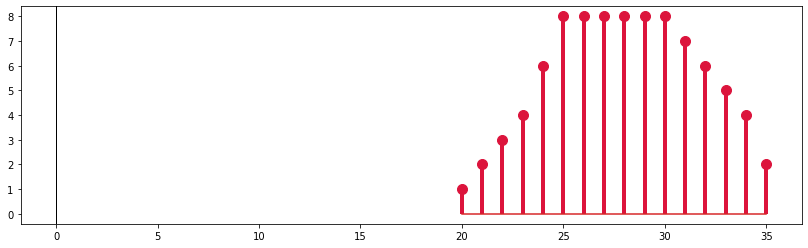

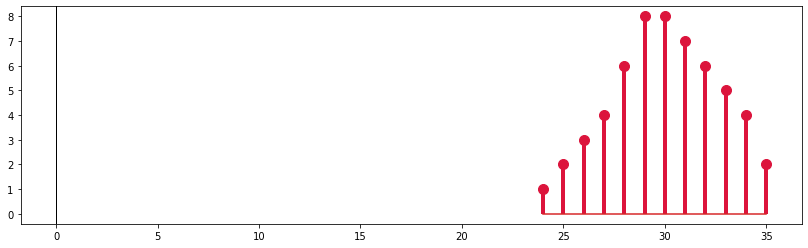

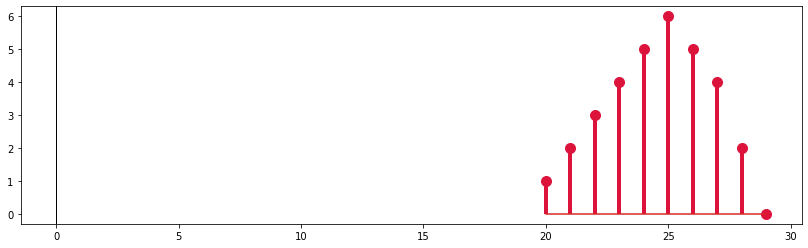

In [12]:
#implementación 6
def make_h(signal):
    return [(1 if i <= 3 else 2) if i>=0 and i<=5 else 0 for i in signal]

def ind_conv(lim_x,lim_h,signal):
    return signal[lim_x[0]+lim_h[0]:lim_x[1]+lim_h[1]],(lim_x[0]+lim_h[0],lim_x[1]+lim_h[1])

muestra6 = np.arange(-10,11)
h = make_h(muestra6)
limh = (10,16)

x1 = escalon_unitario(muestra6)
limx1=(10,20)
y1= np.convolve(x1,h)
y1_situado,eje1 = ind_conv(limx1,limh,y1)
plot_stem(np.arange(eje1[0],eje1[1]), y1_situado)

x2 = escalon_unitario(muestra6-4)
limx2=(14,20)
y2= np.convolve(x2,h)
y2_situado,eje2 = ind_conv(limx2,limh,y2)
plot_stem(np.arange(eje2[0],eje2[1]), y2_situado)

x3 = escalon_unitario(muestra6) - escalon_unitario(muestra6-4) 
limx3=(10,14)
y3= np.convolve(x3,h)
y3_situado,eje3 = ind_conv(limx3,limh,y3)
plot_stem(np.arange(eje3[0],eje3[1]), y3_situado)

###  <span style='background :yellow' >Ejercicio 7</span>

Dado el sistema descrito por ecuaciones en diferencias de coeficientes constantes mostrado en la siguiente figura (Forma directa I):
* Calcula y visualiza su respuesta al impulso $h[n]~~~~~~~~-20<=n<=100$
* Calcula y visualiza su respuesta a la señal escalón $u[n]~~~~~~~~-20<=n<=100$



![Ecuación en diferencias de coeficientes constantes](ecuacion_diferencias.png)



<b>Nota</b> Consideramos que el sistema está en reposo

<b>Nota 2</b> El método necesario para calcular esa ecuación es  *scipy.signal.lfilter*







La función [signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) de scipy permite implementar dichas ecuaciones. La cabecera de la función es: *signal.lfilter(b, a, x, axis=- 1, zi=None)*
* *a* es el vector con los valores correspondientes a las constantes $a_k, k=0..N$
* *b* es el vector con los valores correspondientes a las constantes $b_k, k=0..M$
* *x* es el vector de entrada
* *zi* un vector opcional con las condiciones iniciales del sistema

$y[n]=-\sum\limits_{n=1}^{N}a_k y[n-k] +\sum\limits_{n=0}^{M} b_kx[n-k]$


In [ ]:
#implementación 7